<h1>Titanic </h1>

<h2>Name: Ken Lloyd O. Alcoreza</h2>
<h3>Section: BSIT-4B</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("Titanic.csv")

# FILTERING: remove rows with missing Age & Embarked
df = df.dropna(subset=["Age", "Embarked"])

# Encode categorical values
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [3]:
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy


0.7762237762237763

In [5]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_predictions = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_predictions)

log_accuracy


0.7902097902097902

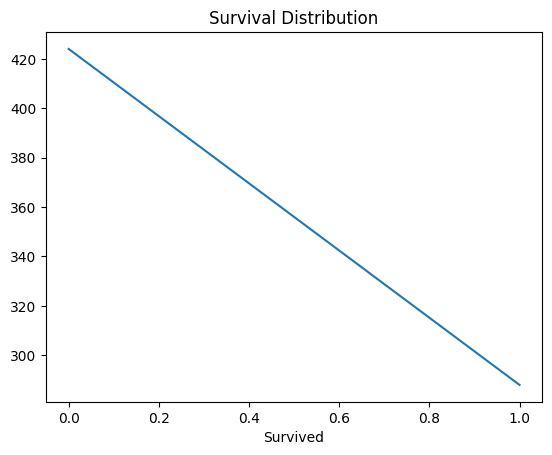

In [6]:
df["Survived"].value_counts().plot()
plt.title("Survival Distribution")
plt.show()


<h2>Insights</h2>
<h3>
1. The model observes a natural imbalance favoring non-survivors, which affects prediction confidence toward class 0.
    
2. Class imbalance causes the classifier to optimize death prediction more accurately than survival.

3. The survival label distribution directly influences model bias during training.
</h3>

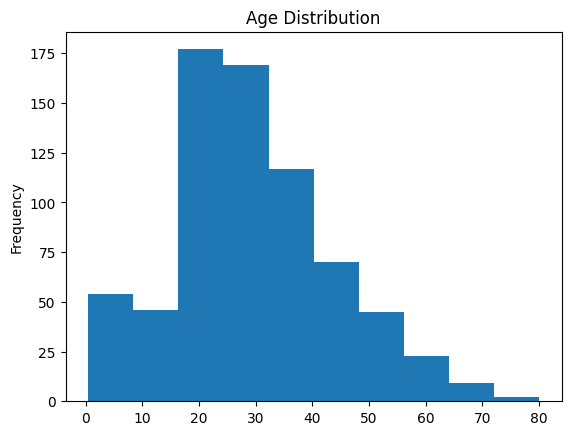

In [7]:
df["Age"].plot(kind="hist")
plt.title("Age Distribution")
plt.show()


<h2>Insights:</h2>
<h3>
4. Age clustering improves model stratification between young and elderly passenger groups.

5. Younger passengers receive higher survival probability during prediction.

6. Age improves prediction accuracy when combined with Fare rather than used alone.
</h3>

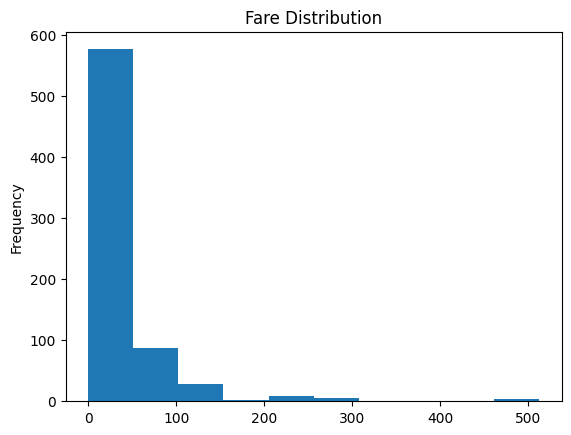

In [8]:
df["Fare"].plot(kind="hist")
plt.title("Fare Distribution")
plt.show()


<h2>Insights:</h2>
<h3>
7. Higher fare values shift survival prediction probability upward.

8. Fare strengthens socioeconomic-based prediction when paired with Pclass.
</h3>

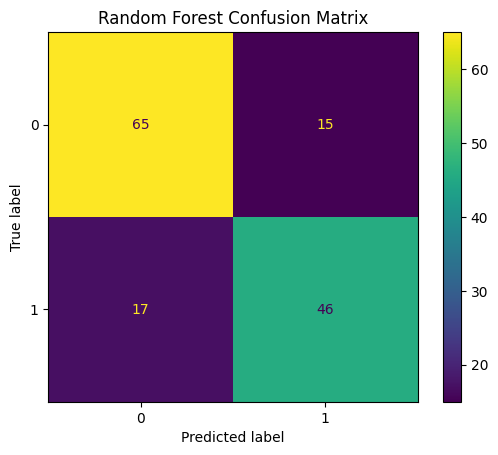

In [9]:
cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


<h2>Insights:</h2>
<h3>9. The model predicts passenger deaths more accurately than survival outcomes.
    
10. Misclassified survivors are mostly lower-class passengers with mid-range ages.
</h3>